<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/zadDomowe7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Zadanie domowe nr 1
* Wczytaj dowolny kolorowy obrazek RGB
* Odbij go w poziomie
* Zamień wartościami warstwę czerwoną z zieloną

[Więcej numpy na obrazkach](https://note.nkmk.me/en/python-numpy-image-processing/)

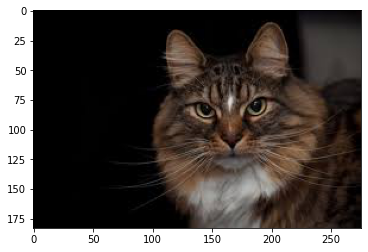

In [2]:
from skimage.io import imread, imsave 
import numpy as np
import matplotlib.pyplot as plt
im=imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKkYGA_oABwDeTome-bm4zUnrVMjvOByIeDQ&usqp=CAU')
plt.imshow(im)

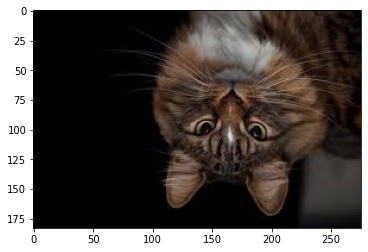

In [3]:
im_flip_lr = np.flip(im, 0)
plt.imshow(im_flip_lr)

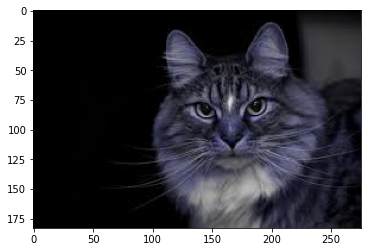

In [4]:
import cv2
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img_rgb = img.copy()
g = img_rgb[:,:,1]
r = img_rgb[:,:,0]
img_rgb[:,:,0]=g
img_rgb[:,:,1]=r
plt.imshow(img_rgb)

#### Zadanie domowe nr 2
Stwórz taki obrazek jak poniżej i nadaj mu tytuł oznaczając imieniem i nazwiskiem. Są na nim wykresy funkcji $y(x)=x^3+5x^2+10$ oraz jej pierwszej i drugiej pochodnej. Im dokładniej odwzorowany obrazek tym lepiej (więcej punktów). Obrazek (Figure) ma proporcje 5:3.
![obrazek](https://raw.githubusercontent.com/danio2010/ON2022/1ed3d5c630585f6e4ea453ff822124f8b0c24b36/lab7-homework.png)

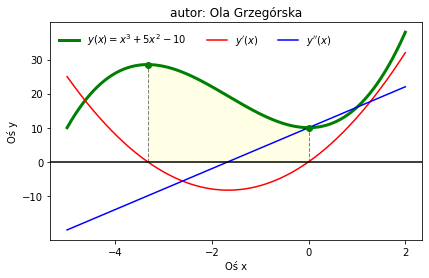

In [9]:
import itertools
from matplotlib.figure import figaspect
from scipy import rand
from skimage.io import imread, imsave
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x=sp.symbols('x')
f=x**3+5*x**2+10
D1f=f.diff(x,1)
D2f=f.diff(x,2)
extrema=sp.solve(f.diff(x))

w, h = figaspect(3/5)
fig,ax=plt.subplots(figsize=(w, h))

inter=np.linspace(-5,2,1000)
g=sp.lambdify(x,f)
h=sp.lambdify(x,D1f)
p=sp.lambdify(x,D2f)
ax.plot(inter,g(inter), label='$y(x)=x^3+5x^2-10$', color='green',linestyle='-',linewidth=3)
ax.plot(inter,h(inter), label ='$y(x)$', color='red',linestyle='-')
ax.plot(inter,p(inter), label = '$y(x)$', color='blue',linestyle='-')

ax.legend( ('$y(x)=x^3+5x^2-10$', '$y\'(x)$','$y\'\'(x)$'),  loc = 'upper left', ncol=3, frameon=False)

ax.set_xticks([-4,-2,0,2])
ax.set_yticks([-10,0,10,20,30])
ax.set(xlabel='Oś x', ylabel='Oś y', title='autor: Ola Grzegórska')
plt.axhline(y=0, color="black", linestyle="-")

for el in extrema:
    if (el>-4 and el<2 and D2f.subs(x,el)>0):
        ax.plot(el,g(el),color='g',marker='o')
        stael = float(el)
    if (el>-4 and el<2 and D2f.subs(x,el)<0):
        ax.plot(el,g(el),color='g',marker='o')
        stoel = float(el)
x = np.linspace(stael,stoel)
ax.fill_between(x, g(x),color='yellow', alpha=0.1)

plt.vlines(x=stoel, ymin=0, ymax=g(stoel), colors='grey', ls='--', lw=1)
plt.vlines(x=stael, ymin=0, ymax=g(stael), colors='grey', ls='--', lw=1)

plt.show()
